#### Regularization in Machine Learning

It is a statistical method to reduce errors caused by overfitting on training data, by adding a penalty term to the cost function in the model. This discourages complex models with high coefficients, promoting simpler and more generalizable solutions. Regularization helps improve a model's performance on unseen data and enhances its overall robustness.
#### Techniques of Regularization

There are mainly two types of regularization techniques, which are given below:

    Ridge Regression (L2 Regularization)
    Lasso Regression (L1 Regularization)

Each influences the model's behavior in different ways.
#### Ridge Regression (L2 Regularization):

It is a statistical regularization technique. It corrects for overfitting on training data for linear regression models.

In this technique, the cost function is altered by adding the penalty term (lambda (λ) or alpha(α)- as per Ridge Class) to it. The amount of bias added to the model is called Ridge Regression penalty. We can calculate it by multiplying with the lambda/alpha to the squared weight of each individual feature.

The equation for the cost function in ridge regression will be:

IMAGE


In the above equation, the penalty term regularizes the coefficients of the model, and hence ridge regression reduces the amplitudes of the coefficients that decreases the complexity of the model.

It can be noted that, if the values of λ tend to zero, the equation becomes the Cost Function of the Linear Regression model.

#### Why do we need Ridge Regression?

General Linear or Polynomial rRegression will fail if there is high collinearity between the independent variables. In such cases, Ridge regression can be used. It effectively addresses the problems if we have more parameters than samples.

Note:

Since, Ridge Regression does not perform feature selection, it cannot reduce model complexity by eliminating features. However, it can shrink high feature weights (i.e., coefficients) across the model using the L2 penalty term. This reduction in complexity helps make model predictions more stable by preventing any one or more features from excessively influencing the model's output.

#### How Ridge Regression Regularization balances Bias-Variance Tradeoff?

In machine learning terms, Ridge Regression amounts to adding bias into a model for the sake of decreasing that model’s variance.

In other words, models regularized through Ridge Regression produce less accurate predictions on training data (higher bias) but more accurate predictions on test data (lower variance). This is the Bias-Variance Tradeoff.

Through Ridge Regression, users accept a loss in training accuracy (higher bias) to enhance a given model's generalization (lower variance). In this way, increasing bias can help improve overall model performance.

#### Simple Linear Regression Vs Simple Ridge Regression
##### Creating Dataset

Creating a Dataset with One Input and One Target Column using sklearn's make_regression class.


In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
input_,target_ = make_regression(n_samples=250, n_features=1, n_informative=3, n_targets=1, noise=20)

Plotting the dataset

Text(0, 0.5, 'target')

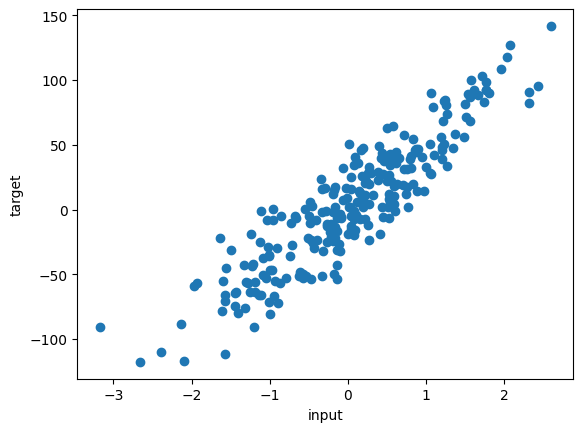

In [3]:
plt.scatter(input_,target_)
plt.xlabel('input')
plt.ylabel('target')

#### Splitting data into train and test datasets

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_input, test_input, train_target, test_target = train_test_split(input_, target_, test_size = 0.2 , random_state = 42)

In [6]:
train_input.shape

(200, 1)

#### Apply LinearRegression on data

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()
lr.fit(train_input, train_target)
print("Linear Regression m", lr.coef_)
print("Linear Regression b", lr.intercept_)

Linear Regression m [46.05389787]
Linear Regression b 3.25332630237995


Apply Ridge Regression on data

In [9]:
from sklearn.linear_model import Ridge

In [10]:
rr = Ridge(alpha = 0.1)
rr.fit(train_input, train_target)
print("Linear Regression m", rr.coef_)
print("Linear Regression b", rr.intercept_)

Linear Regression m [46.02953901]
Linear Regression b 3.2547727092093144


Building Simple Ridge Regression Class.

In [11]:
class RidgeRegressionSimpleLR:
    
    def __init__(self, alpha = 0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    
    # Creating 'fit' Function
    def fit(self, train_input, train_target):
        
        # Calculating slope of the line (m):
        numerator = 0
        denominator = 0
        
        for i in range(train_input.shape[0]):
            
            numerator = numerator + ((train_target[i] - train_target.mean()) * (train_input[i] - train_input.mean()))
            denominator = denominator + ((train_input[i] - train_input.mean()) * (train_input[i] - train_input.mean()))
            
            self.m = numerator/ (denominator + self.alpha)
        
        # Calculating coefficent of the line(b):
        self.b = train_target.mean() - (self.m * train_input.mean())
        
    @property
    def coefficients(self):
        if self.m is not None:
            return self.m
        else:
            print("Model not fitted yet.")
            return None

    @property
    def intercept(self):
        if self.b is not None:
            return self.b
        else:
            print("Model not fitted yet.")
            return None
        
        
    # Creating 'predict' Function
    def predict(self, test_input):
        return self.m * test_input + self.b

In [12]:
rrs = RidgeRegressionSimpleLR()

In [13]:
rrs.fit(train_input, train_target)

In [14]:
print("Ridge Regression m:",rrs.m)
print("Ridge Regression b:",rrs.b)

Ridge Regression m: [46.02953901]
Ridge Regression b: [3.25477271]


Exactly same m and b value of our made RidgeRegressionSimpleLR Class with the sklearn's Ridge Regression Class.

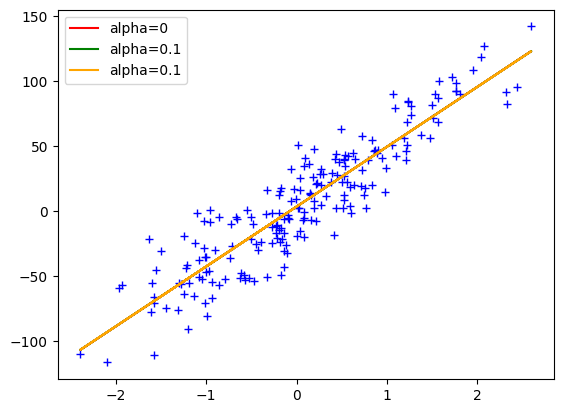

In [15]:
plt.plot(train_input, train_target,'b+')
plt.plot(train_input,lr.predict(train_input),color='red',label='alpha=0')
plt.plot(train_input,rr.predict(train_input),color='green',label='alpha=0.1')
plt.plot(train_input,rrs.predict(train_input),color='orange',label='alpha=0.1')
plt.legend()
plt.show()

All the lines are merging each other. So, let's check the R2 scores for each model.

In [18]:
lr_pred = lr.predict(test_input)
rr_pred = rr.predict(test_input)
rrs_pred = rrs.predict(test_input)

In [20]:
from sklearn.metrics import r2_score
print("LR R2",r2_score(test_target,lr_pred))

print("RR R2",r2_score(test_target,rr_pred))

print("RRS R2",r2_score(test_target,rrs_pred))

LR R2 0.7759449991968781
RR R2 0.7760697611556533
RRS R2 0.7760697611556532


LinarRegression is performing slightly better because we are balancing Bias-Variance Tradeoff from Ridge Regression and our model.

#### Play with Alpha

In [22]:
def RidgeRegression(alpha):

    rr = Ridge(alpha=alpha)
    rr.fit(train_input, train_target)
    print(rr.coef_)
    print(rr.intercept_)
    return rr

In [23]:
rr1 = RidgeRegression(10)

[43.73921635]
3.390770001790813


In [24]:
rr2 = RidgeRegression(100)

[30.1163241]
4.1996850489415305


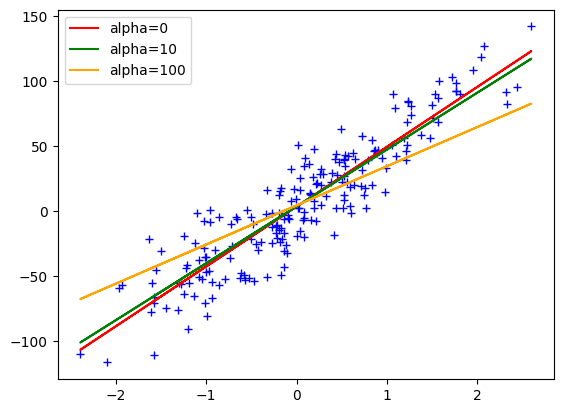

In [25]:
plt.plot(train_input, train_target,'b+')
plt.plot(train_input,rr.predict(train_input),color='red',label='alpha=0')
plt.plot(train_input,rr1.predict(train_input),color='green',label='alpha=10')
plt.plot(train_input,rr2.predict(train_input),color='orange',label='alpha=100')
plt.legend()
plt.show()

Observations made are:

    Low Value of alpha causes overfitting
    High Value of alpha causes underfitting

Above, I have covered Ridge Regression and we build and compared our own RidgeRegressionSimpleLR Class for 2D data.

Now, let’s explore Nth Dimension dataset, using Ridge Regression and upgrade our RidgeRegressionSimpleLR Class.
